In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score,train_test_split, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None)

# Load the feature names from the description file
feature_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order",
    "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people",
    "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business",
    "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font",
    "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george",
    "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999",
    "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting",
    "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table",
    "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$",
    "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total",
    "spam"
]

data.columns = feature_names

In [4]:
# Split data into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Normalize the features (optional, but can improve some models)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Define models and hyperparameters to search
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}

In [6]:
params = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Decision Tree": {"max_depth": [None, 10, 20, 30],
                      "min_samples_split": [2, 5, 10]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7, 9]},
    "Neural Network": {"hidden_layer_sizes": [(50, 50), (100, 100)],
                       "alpha": [0.0001, 0.001, 0.01]},
    "Random Forest": {"n_estimators": [50, 100, 200],
                      "max_depth": [None, 10, 20, 30],
                      "min_samples_split": [2, 5, 10]},
    "XGBoost": {"n_estimators": [50, 100, 200],
                "max_depth": [3, 5, 7],
                "learning_rate": [0.01, 0.1, 0.2]},
    "SVM": {"C": [0.01, 0.1, 1, 10],
            "kernel": ["linear", "rbf"]}
}

In [7]:
# Initialize variables to store the best models and their performance
best_models = {}
best_metrics = {}
results = []

# Nested cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [8]:
for model_name, model in models.items():

    hyperparameters = RandomizedSearchCV(
        model, param_distributions=params[model_name], scoring='accuracy', n_iter=10, cv=inner_cv, random_state=42
    )
    nested_scores = cross_val_score(hyperparameters, X, y, cv=outer_cv, scoring='accuracy')
    y_preds = cross_val_predict(model, X, y, cv=outer_cv)
    
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds)
    recall = recall_score(y, y_preds)
    f1 = f1_score(y, y_preds)
    auc_roc = roc_auc_score(y, y_preds)

    results.append([model_name, accuracy, precision, recall, f1, auc_roc])

# Create a DataFrame with the results
columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC ROC"]
df = pd.DataFrame(results, columns=columns)

# Print the results
print(df)

  File "C:\Users\Jessica\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


                 Model  Accuracy  Precision    Recall  F1 Score   AUC ROC
0  Logistic Regression  0.925016   0.920389  0.886376  0.903063  0.918260
1        Decision Tree  0.909150   0.881356  0.889134  0.885228  0.905650
2  K-Nearest Neighbors  0.908715   0.893725  0.872035  0.882747  0.902302
3       Neural Network  0.942404   0.932886  0.920022  0.926409  0.938490
4        Random Forest  0.953923   0.953541  0.928296  0.940749  0.949442
5              XGBoost  0.951315   0.941634  0.934363  0.937984  0.948351
6                  SVM  0.932189   0.932067  0.892995  0.912113  0.925335


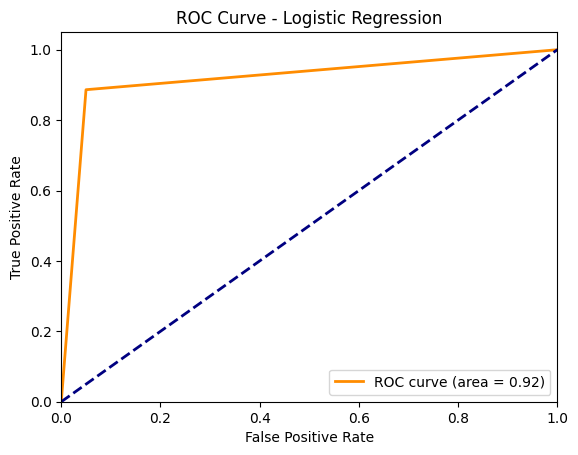

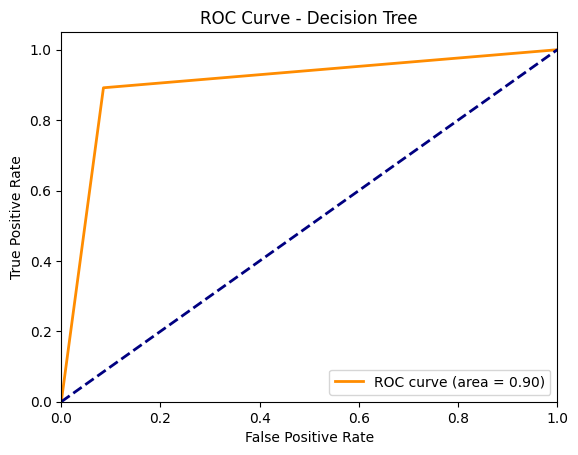

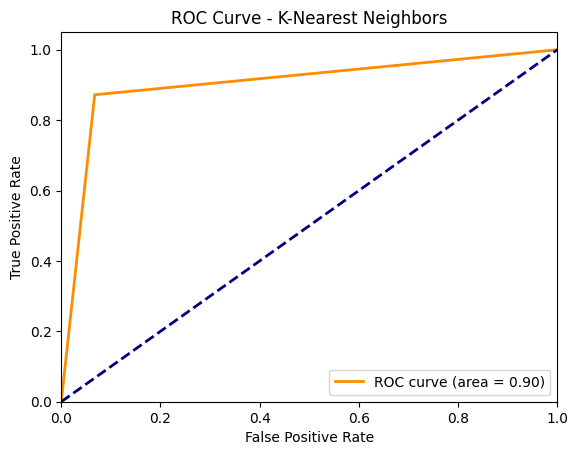

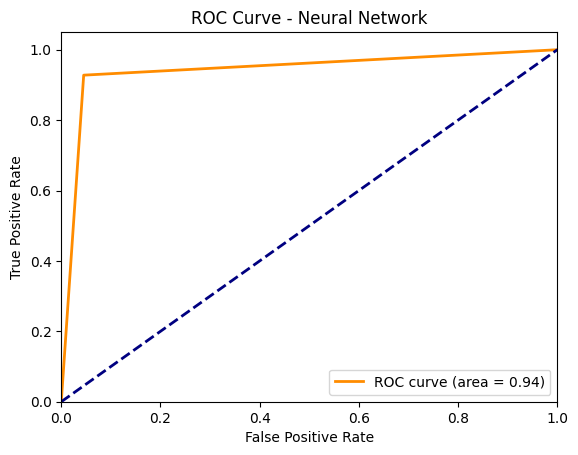

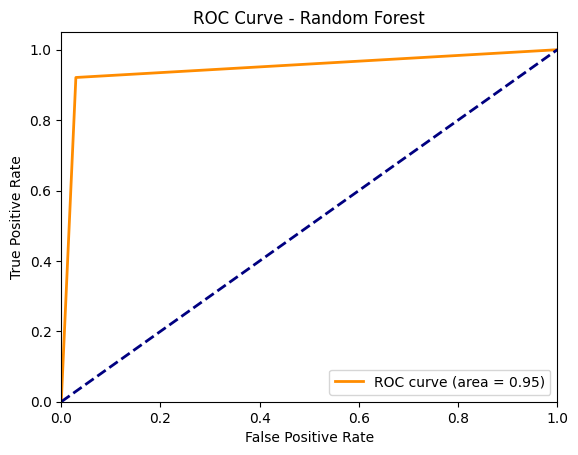

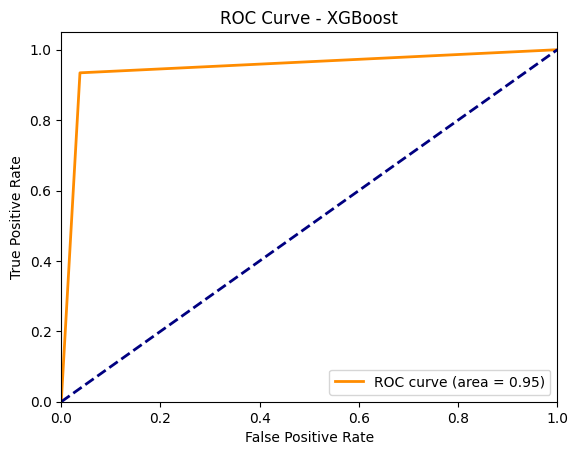

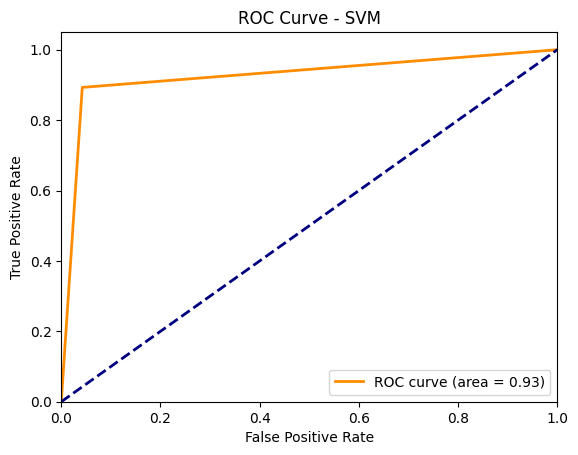

                  Model  Accuracy  Precision    Recall  F1 Score   AUC ROC  \
0   Logistic Regression  0.925016   0.920389  0.886376  0.903063  0.918260   
1         Decision Tree  0.909150   0.881356  0.889134  0.885228  0.905650   
2   K-Nearest Neighbors  0.908715   0.893725  0.872035  0.882747  0.902302   
3        Neural Network  0.942404   0.932886  0.920022  0.926409  0.938490   
4         Random Forest  0.953923   0.953541  0.928296  0.940749  0.949442   
5               XGBoost  0.951315   0.941634  0.934363  0.937984  0.948351   
6                   SVM  0.932189   0.932067  0.892995  0.912113  0.925335   
7   Logistic Regression  0.925016   0.920389  0.886376  0.903063  0.918260   
8         Decision Tree  0.905890   0.872168  0.891892  0.881920  0.903442   
9   K-Nearest Neighbors  0.908715   0.893725  0.872035  0.882747  0.902302   
10       Neural Network  0.944143   0.930310  0.927744  0.929025  0.941275   
11        Random Forest  0.951098   0.953196  0.921125  0.936886

In [9]:
for model_name, model in models.items():
    hyperparameters = RandomizedSearchCV(
        model, param_distributions=params[model_name], scoring='accuracy', n_iter=10, cv=inner_cv, random_state=42
    )
    nested_scores = cross_val_score(hyperparameters, X, y, cv=outer_cv, scoring='accuracy')
    y_preds = cross_val_predict(model, X, y, cv=outer_cv)
    
    # Evaluate cost-sensitive prediction models with 10:1 cost ratio
    false_positive_cost = 10
    false_negative_cost = 1

    cost_sensitive_accuracy = accuracy_score(y, y_preds)
    cost_sensitive_precision = precision_score(y, y_preds)
    cost_sensitive_recall = recall_score(y, y_preds)
    cost_sensitive_f1 = f1_score(y, y_preds)
    cost_sensitive_auc_roc = roc_auc_score(y, y_preds)

    # Calculate the confusion matrix
    cm = confusion_matrix(y, y_preds)
    cost = (cm[0, 1] * false_positive_cost + cm[1, 0] * false_negative_cost) / len(y)

    results.append([model_name, cost_sensitive_accuracy, cost_sensitive_precision, cost_sensitive_recall,
                    cost_sensitive_f1, cost_sensitive_auc_roc, cost])
    
    # Plot ROC curves
    fpr, tpr, thresholds = roc_curve(y, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Create a DataFrame with the results
columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC ROC", "Average Misclassification Cost"]
df = pd.DataFrame(results, columns=columns)

# Print the results
print(df)

In [10]:
# Compute the average performance of each model
average_performance = df.groupby("Model")[["Accuracy", "Precision", "Recall", "F1 Score", "AUC ROC", "Average Misclassification Cost"]].mean().reset_index()

# Print the average performance
print("Average Performance of Each Model:")
print(average_performance)

Average Performance of Each Model:
                 Model  Accuracy  Precision    Recall  F1 Score   AUC ROC  \
0        Decision Tree  0.907520   0.876762  0.890513  0.883574  0.904546   
1  K-Nearest Neighbors  0.908715   0.893725  0.872035  0.882747  0.902302   
2  Logistic Regression  0.925016   0.920389  0.886376  0.903063  0.918260   
3       Neural Network  0.943273   0.931598  0.923883  0.927717  0.939883   
4        Random Forest  0.952510   0.953369  0.924710  0.938818  0.947649   
5                  SVM  0.932189   0.932067  0.892995  0.912113  0.925335   
6              XGBoost  0.951315   0.941634  0.934363  0.937984  0.948351   

   Average Misclassification Cost  
0                        0.557705  
1                        0.459031  
2                        0.346881  
3                        0.302326  
4                        0.209302  
5                        0.298631  
6                        0.254075  
